# Employee Attrition Analysis

## By Olomo Rachael

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

### What type of employees are leaving?
##### To answer this question, we will be using the 'employees who have left dataset'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(io = 'TakenMind-Python-Analytics-Problem-case-study-1-1 (1).xlsx', sheet_name= 2)

In [3]:
data.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
Emp ID                   3571 non-null int64
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
promotion_last_5years    3571 non-null int64
dept                     3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [5]:
data.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


### EDA

In [6]:
data_2 = data.copy()
data_2.drop(['Emp ID'], axis = 1, inplace= True)
data_2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

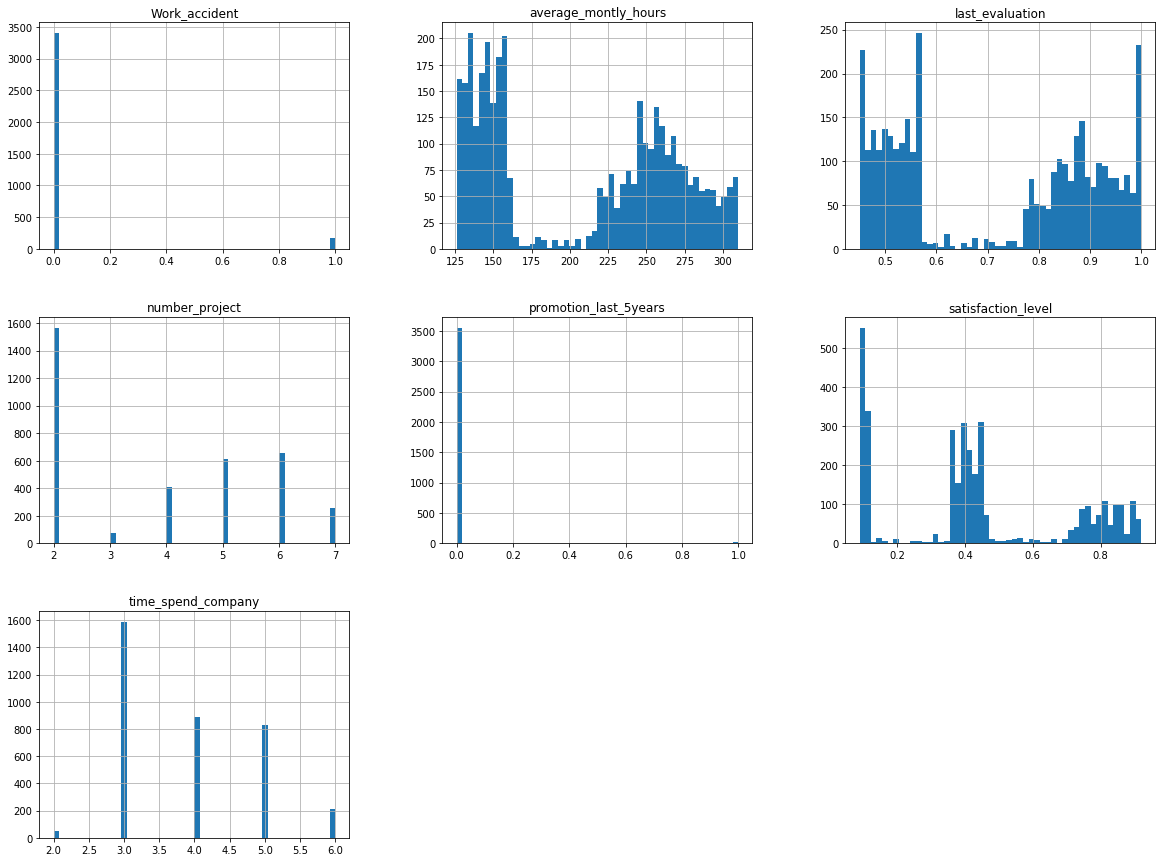

In [7]:
data_2.hist(bins = 50, figsize = (20,15))
plt.show()
%matplotlib inline

Analysis 1: For the " promotion_last_5years " histogram, I can tell that most most of the employees that left the company had not been promoted in the past 5 years.

Analysis 2: Most of the employees that worked for this company experienced no work accidents/casualities.

Analysis 3: Most of the employees who left the company spent 3 years working with the company.

### Employee Attrition Vs Departments

In [8]:
data_2['dept'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

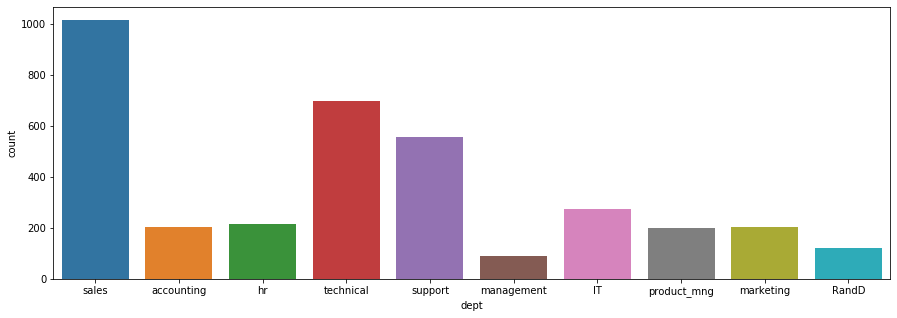

In [9]:
plt.rcParams['figure.figsize'] = 15, 5; 
#sns.plot(data_2['dept'].value_counts(), hist=False)
sns.countplot(x='dept', data= data_2)

The department with the highest employee attrition is the sales department. Therefore, most of the employees with the tendency to leave will come from the sales department based on past data.

### Time Spent in the Company Vs Number of Projects

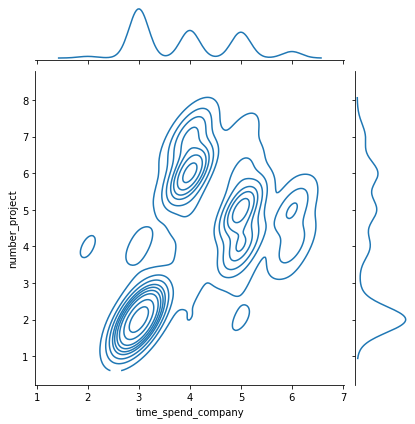

In [10]:
g = sns.jointplot(data=data_2, x="time_spend_company", y="number_project", kind = 'kde')

Insight 1 from the graph above: The average distribution of employees that left the company spent 3 years in the company, and achieved 2 projects at most.

Insight 2 from the graph above: Most employees that spent 4 years in the company before leaving carried out 6 projects.

Insight 3 from the graph above: Most employees that spent 5 years in the company and above before leaving carried out 5 projects.

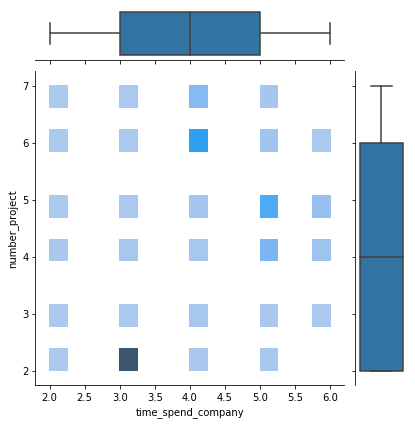

In [11]:
f = sns.JointGrid(data=data_2, x="time_spend_company", y="number_project")
f.plot_joint(sns.histplot)
f.plot_marginals(sns.boxplot)

For employees who have left, the average time spent in the company is 4 years while, the average number of projects achieved are 4.

### Salary Vs Satisfaction Level 

C:\Users\AYOBAMI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


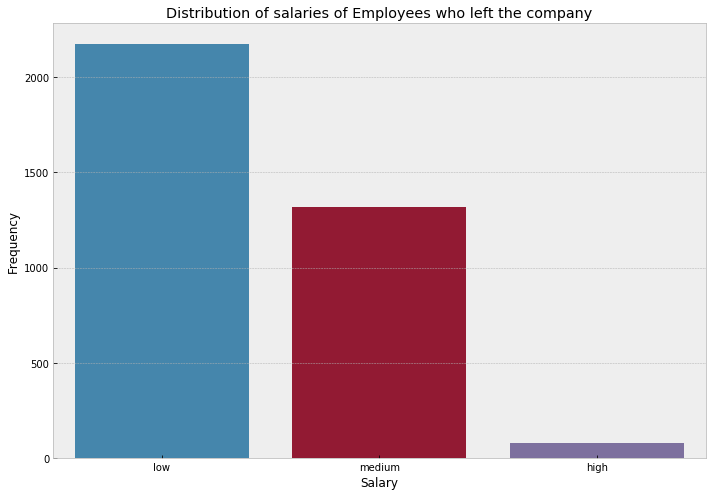

In [12]:
plt.figure(figsize=(10,7))
#sns.set(style='dark')
plt.style.use('bmh')
sns.countplot(data_2['salary'])
plt.title('Distribution of salaries of Employees who left the company')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()

Most employees that left had low salaries

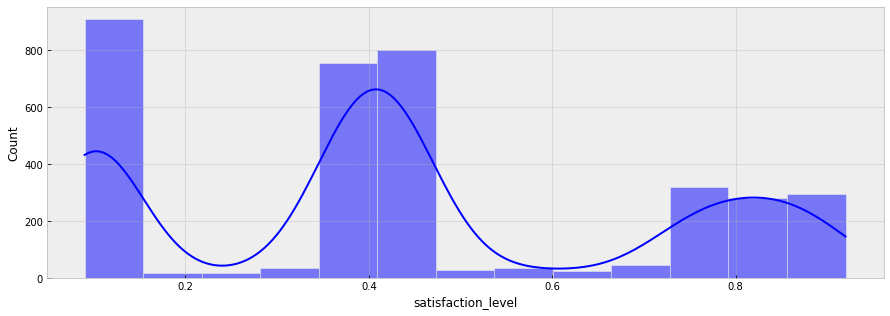

In [13]:
sns.histplot(data_2['satisfaction_level'], kde = True)

From the distribution graph above, most employees that left the company had a satisfaction rate below average. Highest distribution frequency is around 0.4.

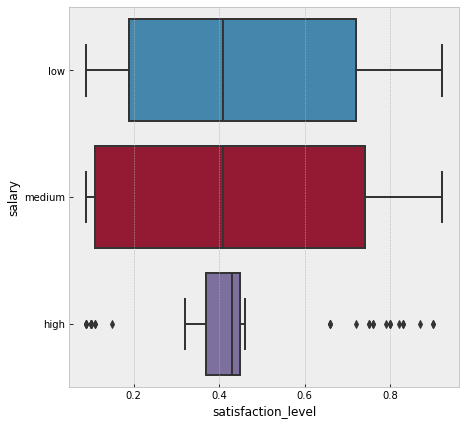

In [14]:
plt.figure(figsize=(7,7))
h = sns.boxplot(data=data_2, x="satisfaction_level", y="salary")

The average distribution of the grapgh above shows that the low, medium and high salary earners had satisfaction levels below average concerning both their jobs and the company itself.

### Satisfaction Level Vs Department

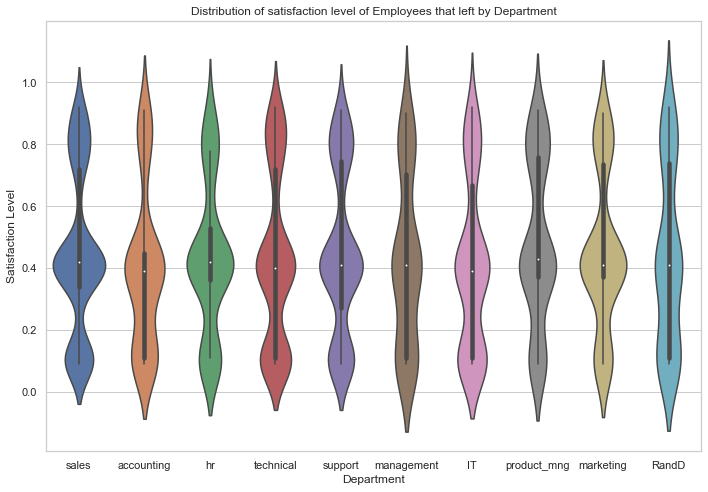

In [15]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.violinplot(x='dept', y='satisfaction_level', data=data_2)
plt.title('Distribution of satisfaction level of Employees that left by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.tight_layout()

The departments with the highest satisfaction levels are between the 'Sales', 'IT' and 'Rand D' departments.
While the department with the lowest satisfaction level is the 'Sales' department.

In [16]:
#pip install seaborn --upgrade

### Satisfaction Level Vs Salary Vs Department

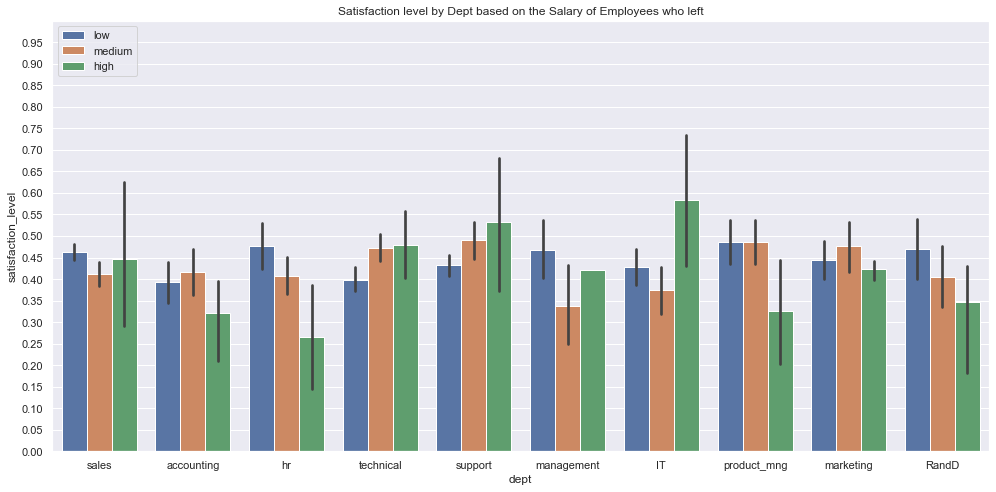

In [17]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept', y='satisfaction_level', hue='salary', data = data_2)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('Satisfaction level by Dept based on the Salary of Employees who left')
plt.tight_layout()
plt.legend(loc=2)

The department with the highest satisfaction rate and highest pay is the IT department.
While the department with the lowest pay is the Accounting department.

### Average Montly Hours Vs Salary

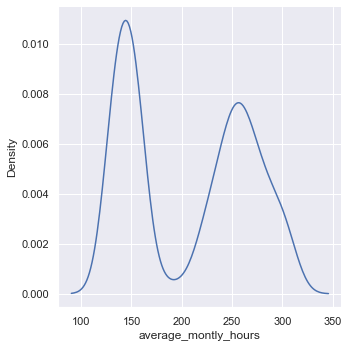

In [18]:
sns.displot(data_2['average_montly_hours'], kind = 'kde')

The average montly hours had their distribution picks at 140 hours and 260 hours.

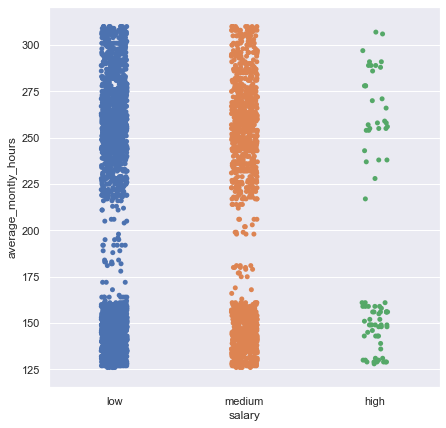

In [19]:
plt.figure(figsize=(7,7))
sns.stripplot(x='salary',y='average_montly_hours',data=data_2)

The low and medium range salary employees worked for longer hours compared to the high range salary earners who worked for negligible number of hours.

### Conclusion to the first question:
-Employees from the sales department are mostly leaving.

-Employees are who are leaving have achieved an average of 2-4 projects and spent an average of 3-4 years with the company.

-Most employees who are leaving fall within the low salary range and are not satisfied with working in the company.

### What employees are prone to leave next?

##### To answer this question, i will take the dataset of the employees who have left, alongside some employees who are still in the company to train different models.
##### 1= employee attrition, 0 = no employee attrition
##### Then i will test the best performing model with some of the data from the existing employees dataset.
##### With this method, we will know the employees that are prone to leave.

### Data Cleaning and Preprocessing

In [20]:
data_2['attrition']=1

In [21]:
data_2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [22]:
data_3 = pd.read_excel(io = 'TakenMind-Python-Analytics-Problem-case-study-1-1 (1).xlsx', sheet_name= 1)

In [23]:
data_3.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [24]:
data_4 = data_3.copy()
data_4.drop(['Emp ID'], axis = 1, inplace= True)
data_4.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [25]:
data_4['attrition']= 0
data_4.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,0.58,0.74,4,215,3,0,0,sales,low,0
1,0.82,0.67,2,202,3,0,0,sales,low,0
2,0.45,0.69,5,193,3,0,0,sales,low,0
3,0.78,0.82,5,247,3,0,0,sales,low,0
4,0.49,0.60,3,214,2,0,0,sales,low,0


In [26]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11328 entries, 0 to 11327
Data columns (total 10 columns):
satisfaction_level       11328 non-null float64
last_evaluation          11328 non-null float64
number_project           11328 non-null int64
average_montly_hours     11328 non-null int64
time_spend_company       11328 non-null int64
Work_accident            11328 non-null int64
promotion_last_5years    11328 non-null int64
dept                     11328 non-null object
salary                   11328 non-null object
attrition                11328 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 885.1+ KB


*** stratified data for data_4 (this will be used as your test data for prediction)

In [27]:
data_5 = data_4.iloc[0:,0:10]

In [28]:
data_5.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,0.58,0.74,4,215,3,0,0,sales,low,0
1,0.82,0.67,2,202,3,0,0,sales,low,0
2,0.45,0.69,5,193,3,0,0,sales,low,0
3,0.78,0.82,5,247,3,0,0,sales,low,0
4,0.49,0.60,3,214,2,0,0,sales,low,0


In [29]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11328 entries, 0 to 11327
Data columns (total 10 columns):
satisfaction_level       11328 non-null float64
last_evaluation          11328 non-null float64
number_project           11328 non-null int64
average_montly_hours     11328 non-null int64
time_spend_company       11328 non-null int64
Work_accident            11328 non-null int64
promotion_last_5years    11328 non-null int64
dept                     11328 non-null object
salary                   11328 non-null object
attrition                11328 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 885.1+ KB


In [30]:
dataset = pd.concat([data_2, data_5], ignore_index=True, sort=False)

In [31]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [32]:
dataset["attrition"].value_counts()

0    11328
1     3571
Name: attrition, dtype: int64

### Dummy Coding Categorical Values

In [33]:
dataset.salary.value_counts()  # number of people for each category

low       7275
medium    6402
high      1222
Name: salary, dtype: int64

In [34]:
dataset.dept.value_counts()  # number of people for each category

sales          4112
technical      2697
support        2217
IT             1220
product_mng     897
marketing       854
RandD           780
accounting      764
hr              736
management      622
Name: dept, dtype: int64

In [35]:
# dummy coding all categorical predictors and naming each dummy coded column
salary_dummy = pd.get_dummies(dataset.salary)
salary_dummy.columns = ['salary_' + str(col) for col in salary_dummy.columns]
dept_dummy = pd.get_dummies(dataset.dept)
dept_dummy.columns = ['dept_' + str(col) for col in dept_dummy.columns]

In [36]:
# dummy coding our target
attrition_dummy = pd.get_dummies(dataset.attrition, drop_first= True)
attrition_dummy.columns

Int64Index([1], dtype='int64')

In [37]:
attrition_dummy.columns = ['attrition_1']
attrition_dummy.columns

Index(['attrition_1'], dtype='object')

In [38]:
dataset_dummy = pd.concat([dataset, salary_dummy, dept_dummy,attrition_dummy], axis=1)

In [39]:
dataset_dummy.drop(['salary', 'dept', 'attrition'], axis=1, inplace=True)
dataset_dummy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_support', 'dept_technical', 'attrition_1'],
      dtype='object')

In [40]:
dataset_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,...,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,attrition_1
0,0.38,0.53,2,157,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [41]:
# dummmy coded csv file
dataset_dummy.to_csv('encoded_employee_attrition_dummy.csv')

### Checking for Outliers

Several machine learning algorithms make the assumption that the data follow a normal (or Gaussian) distribution. This is easy to check with the skewness value, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

In [42]:
print(dataset_dummy.skew())

satisfaction_level      -0.474781
last_evaluation         -0.025733
number_project           0.337409
average_montly_hours     0.051873
time_spend_company       1.850551
Work_accident            2.024656
promotion_last_5years    6.657998
salary_high              3.046888
salary_low               0.046866
salary_medium            0.284078
dept_IT                  3.050140
dept_RandD               4.019923
dept_accounting          4.069237
dept_hr                  4.159165
dept_management          4.582704
dept_marketing           3.809181
dept_product_mng         3.698192
dept_sales               1.002347
dept_support             1.973814
dept_technical           1.657066
attrition_1              1.219736
dtype: float64


### Visualizing the outliers

In [43]:
#fig, axes = plt.subplots(4,3, figsize=(30, 20),squeeze=False)
#axes = axes.flatten()
#print('\n'*3)
#print(' '*70, 'Columns with Outliers')
#print('\n'*6)
#for pl,col in enumerate(list(dataset_dummy.columns.values)):
    #sns.boxplot(ax=axes[pl], data =dataset_dummy, y=col)
    

 I will not be treating the outliers in the visualization above.

In [44]:
dataset_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14899 entries, 0 to 14898
Data columns (total 21 columns):
satisfaction_level       14899 non-null float64
last_evaluation          14899 non-null float64
number_project           14899 non-null int64
average_montly_hours     14899 non-null int64
time_spend_company       14899 non-null int64
Work_accident            14899 non-null int64
promotion_last_5years    14899 non-null int64
salary_high              14899 non-null uint8
salary_low               14899 non-null uint8
salary_medium            14899 non-null uint8
dept_IT                  14899 non-null uint8
dept_RandD               14899 non-null uint8
dept_accounting          14899 non-null uint8
dept_hr                  14899 non-null uint8
dept_management          14899 non-null uint8
dept_marketing           14899 non-null uint8
dept_product_mng         14899 non-null uint8
dept_sales               14899 non-null uint8
dept_support             14899 non-null uint8
dept_technica

In [45]:
#final_data = dataset_dummy.sample(n=7500)
final_data = dataset_dummy

In [46]:
final_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,...,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,attrition_1
0,0.38,0.53,2,157,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### Standardization

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaler.fit(final_data.drop('attrition_1', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
transformed_data = scaler.transform(final_data.drop('attrition_1', axis = 1))

In [51]:
transformed_data

array([[-0.93435296, -1.08770024, -1.46177718, ...,  1.61965974,
        -0.41810848, -0.47013758],
       [ 0.75356284,  0.83998559,  0.96982143, ...,  1.61965974,
        -0.41810848, -0.47013758],
       [-2.01944169,  0.95681504,  2.59088717, ...,  1.61965974,
        -0.41810848, -0.47013758],
       ...,
       [ 0.95450519, -1.02928552, -0.65124431, ..., -0.61741363,
        -0.41810848, -0.47013758],
       [-1.13529532, -0.38672358, -0.65124431, ..., -0.61741363,
        -0.41810848, -0.47013758],
       [-0.45209131,  0.0805942 ,  0.15928856, ..., -0.61741363,
        -0.41810848, -0.47013758]])

In [52]:
processed_data= pd.DataFrame(transformed_data, columns= final_data.columns[:-1])

In [53]:
processed_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,-0.934353,-1.087700,-1.461777,-0.882280,-0.342035,-0.410659,-0.146966,-0.29891,1.023705,-0.868011,-0.298643,-0.235042,-0.232487,-0.227961,-0.208726,-0.246586,-0.253105,1.61966,-0.418108,-0.470138
1,0.753563,0.839986,0.969821,1.218437,1.715286,-0.410659,-0.146966,-0.29891,-0.976844,1.152060,-0.298643,-0.235042,-0.232487,-0.227961,-0.208726,-0.246586,-0.253105,1.61966,-0.418108,-0.470138
2,-2.019442,0.956815,2.590887,1.418505,0.343739,-0.410659,-0.146966,-0.29891,-0.976844,1.152060,-0.298643,-0.235042,-0.232487,-0.227961,-0.208726,-0.246586,-0.253105,1.61966,-0.418108,-0.470138
3,0.432055,0.898400,0.969821,0.438171,1.029512,-0.410659,-0.146966,-0.29891,1.023705,-0.868011,-0.298643,-0.235042,-0.232487,-0.227961,-0.208726,-0.246586,-0.253105,1.61966,-0.418108,-0.470138
4,-0.974541,-1.146115,-1.461777,-0.842266,-0.342035,-0.410659,-0.146966,-0.29891,1.023705,-0.868011,-0.298643,-0.235042,-0.232487,-0.227961,-0.208726,-0.246586,-0.253105,1.61966,-0.418108,-0.470138


In [54]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14899 entries, 0 to 14898
Data columns (total 20 columns):
satisfaction_level       14899 non-null float64
last_evaluation          14899 non-null float64
number_project           14899 non-null float64
average_montly_hours     14899 non-null float64
time_spend_company       14899 non-null float64
Work_accident            14899 non-null float64
promotion_last_5years    14899 non-null float64
salary_high              14899 non-null float64
salary_low               14899 non-null float64
salary_medium            14899 non-null float64
dept_IT                  14899 non-null float64
dept_RandD               14899 non-null float64
dept_accounting          14899 non-null float64
dept_hr                  14899 non-null float64
dept_management          14899 non-null float64
dept_marketing           14899 non-null float64
dept_product_mng         14899 non-null float64
dept_sales               14899 non-null float64
dept_support             14

### Train-Test-Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, final_data['attrition_1'], test_size= 0.2, random_state = 42)

### Training using the Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier
Dtree= DecisionTreeClassifier()
Dtree.fit(X_train, y_train)
pred = Dtree.predict(X_test)

### Classification Report For Decision Tree

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2243
           1       0.95      0.97      0.96       737

    accuracy                           0.98      2980
   macro avg       0.97      0.98      0.97      2980
weighted avg       0.98      0.98      0.98      2980



In [60]:
print(confusion_matrix(y_test, pred))

[[2202   41]
 [  21  716]]


### Training using the Random Forest Model

In [61]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100)
RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)

### Classification Report For Random Forest

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2243
           1       0.98      0.97      0.98       737

    accuracy                           0.99      2980
   macro avg       0.99      0.98      0.99      2980
weighted avg       0.99      0.99      0.99      2980



In [63]:
print(confusion_matrix(y_test, RFC_pred))

[[2232   11]
 [  22  715]]


### Training using the SVM Model

In [64]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
SVC_pred = model.predict(X_test)

C:\Users\AYOBAMI\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, SVC_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2243
           1       0.88      0.89      0.89       737

    accuracy                           0.94      2980
   macro avg       0.92      0.93      0.93      2980
weighted avg       0.94      0.94      0.94      2980



In [66]:
print(confusion_matrix(y_test, SVC_pred))

[[2157   86]
 [  79  658]]


##### The random forest model performed the best due to the following reasons, the accuracy of the model is 99%, its F1 Scores are both 98% and 99% these scores are great as F1 Score is the balance metric between recall and precision. Also, its confusion matrix is convincing enough in terms of: out of 2980 test samples, 2232 of its predictions are true positives, 716 of its predictions are true negatives, 11 are false positives and 21 are false negatives.

##### I know my model is biased but it's for the reason thus as follows: I need my model to be trained with more data samples of employees who have left. So with an unseen set of test data fed into it, it will be able to most accurately predict if an employee will leave. Which the the objective of this project.

### Dummy Code Test Data

In [67]:
test_data = pd.read_excel(io = 'TakenMind-Python-Analytics-Problem-case-study-1-1 (1).xlsx', sheet_name= 3 )

In [68]:
test_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.81,0.62,3,100,3,0,0,sales,low
1,0.76,0.74,5,132,3,0,0,technical,medium
2,0.97,0.60,3,162,3,0,0,technical,medium
3,0.39,0.36,3,168,3,1,0,sales,low
4,0.54,0.77,4,271,3,0,0,support,medium


In [69]:
# dummy coding all categorical predictors and naming each dummy coded column
salary_tdummy = pd.get_dummies(test_data.salary)
salary_tdummy.columns = ['salary_' + str(col) for col in salary_tdummy.columns]
dept_tdummy = pd.get_dummies(test_data.dept)
dept_tdummy.columns = ['dept_' + str(col) for col in dept_tdummy.columns]

In [70]:
test_dummy = pd.concat([test_data, salary_tdummy, dept_tdummy], axis=1)

In [71]:
test_dummy.drop(['salary', 'dept'], axis=1, inplace=True)
test_dummy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_support', 'dept_technical'],
      dtype='object')

In [72]:
test_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.81,0.62,3,100,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.76,0.74,5,132,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.97,0.60,3,162,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.39,0.36,3,168,3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.54,0.77,4,271,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [73]:
# dummmy coded csv file
test_dummy.to_csv('encoded_employee_attrition_test.csv')

### Model Prediction using Test Samples

In [74]:
scaler.fit(test_dummy)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
scaled_test = scaler.transform(test_dummy)

In [76]:
scaled_test

array([[ 0.69786293, -0.48646236, -0.71458405, ...,  1.60356745,
        -0.36927447, -0.54653573],
       [ 0.45952177,  0.23422262,  1.21672419, ..., -0.62360956,
        -0.36927447,  1.82970656],
       [ 1.46055466, -0.60657652, -0.71458405, ..., -0.62360956,
        -0.36927447,  1.82970656],
       ...,
       [ 0.60252646,  0.95490759,  1.21672419, ...,  1.60356745,
        -0.36927447, -0.54653573],
       [ 0.31651707,  1.61553549, -0.71458405, ...,  1.60356745,
        -0.36927447, -0.54653573],
       [ 0.3641853 ,  1.49542133,  1.21672419, ..., -0.62360956,
        -0.36927447, -0.54653573]])

In [77]:
attrition_prone = np.matrix(scaled_test)

In [78]:
attrition_prone

matrix([[ 0.69786293, -0.48646236, -0.71458405, ...,  1.60356745,
         -0.36927447, -0.54653573],
        [ 0.45952177,  0.23422262,  1.21672419, ..., -0.62360956,
         -0.36927447,  1.82970656],
        [ 1.46055466, -0.60657652, -0.71458405, ..., -0.62360956,
         -0.36927447,  1.82970656],
        ...,
        [ 0.60252646,  0.95490759,  1.21672419, ...,  1.60356745,
         -0.36927447, -0.54653573],
        [ 0.31651707,  1.61553549, -0.71458405, ...,  1.60356745,
         -0.36927447, -0.54653573],
        [ 0.3641853 ,  1.49542133,  1.21672419, ..., -0.62360956,
         -0.36927447, -0.54653573]])

In [79]:
final_result = RFC.predict(scaled_test)

In [80]:
final_result

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [81]:
a = pd.DataFrame(test_dummy)

In [82]:
a

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.81,0.62,3,100,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.76,0.74,5,132,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.97,0.60,3,162,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.39,0.36,3,168,3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.54,0.77,4,271,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,0.96,0.88,4,165,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,0.58,0.83,4,163,3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7,0.61,0.71,4,243,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8,0.74,0.59,3,274,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9,0.62,0.88,2,263,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [83]:
b = pd.DataFrame(final_result)

In [84]:
b

,0
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,1
9,0


In [85]:
predicted_result = a.join(b)

In [86]:
predicted_result

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,...,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,0
0,0.81,0.62,3,100,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.76,0.74,5,132,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.97,0.60,3,162,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.39,0.36,3,168,3,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.54,0.77,4,271,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5,0.96,0.88,4,165,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,0.58,0.83,4,163,3,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,0.61,0.71,4,243,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0.74,0.59,3,274,3,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
9,0.62,0.88,2,263,4,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [87]:
predicted_result= predicted_result.rename(columns= {0: 'att_prediction'})

In [88]:
predicted_result

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,...,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,att_prediction
0,0.81,0.62,3,100,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.76,0.74,5,132,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.97,0.60,3,162,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.39,0.36,3,168,3,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.54,0.77,4,271,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5,0.96,0.88,4,165,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,0.58,0.83,4,163,3,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,0.61,0.71,4,243,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0.74,0.59,3,274,3,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
9,0.62,0.88,2,263,4,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [89]:
predicted_result.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,...,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,att_prediction
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,0.66360,0.701000,3.740000,193.810000,3.420000,0.190000,0.040000,0.15000,0.410000,0.440000,...,0.070000,0.030000,0.030000,0.08000,0.040000,0.050000,0.280000,0.120000,0.230000,0.08000
std,0.21084,0.167347,1.040784,42.915161,1.724336,0.394277,0.196946,0.35887,0.494311,0.498888,...,0.256432,0.171447,0.171447,0.27266,0.196946,0.219043,0.451261,0.326599,0.422953,0.27266
min,0.15000,0.360000,2.000000,100.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.54750,0.580000,3.000000,164.750000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.71500,0.730000,4.000000,189.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.81000,0.820000,4.250000,228.000000,4.000000,0.000000,0.000000,0.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,0.98000,1.000000,6.000000,286.000000,10.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### EDA for Predicted Results

#### Attrition Count

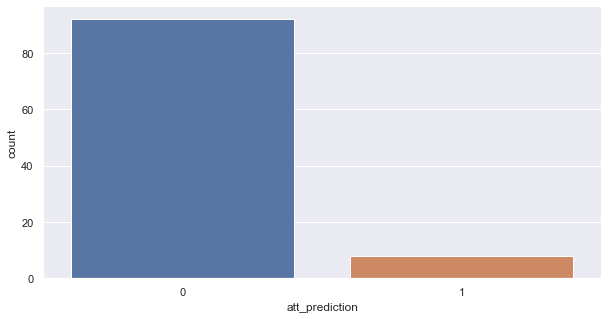

In [90]:
plt.rcParams['figure.figsize'] = 10, 5; 
sns.countplot(x= 'att_prediction', data = predicted_result)

##### Our model predicted that a good number of the employees working with the company currently will not leave the company.

#### Departments most affected by attrition

In [91]:
dept_vis = predicted_result.copy()
dept_vis.drop(['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary_high','salary_low', 'salary_medium',]
              , axis = 1, inplace= True)
dept_vis.columns

Index(['dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_support', 'dept_technical', 'att_prediction'],
      dtype='object')

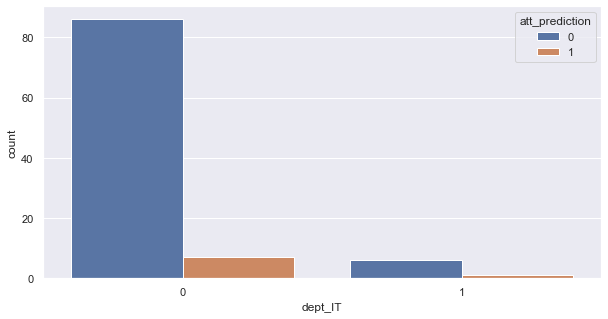

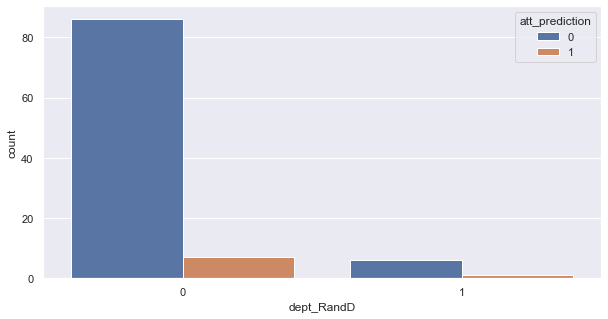

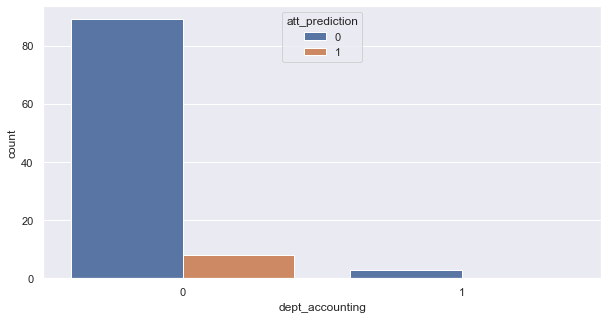

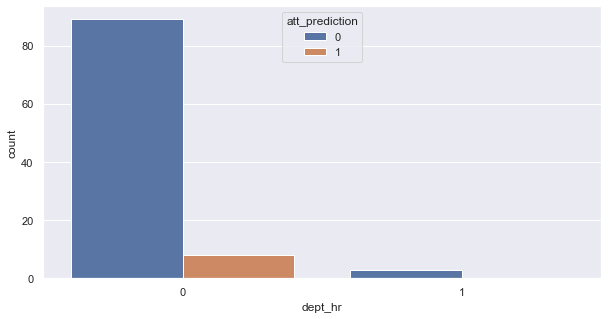

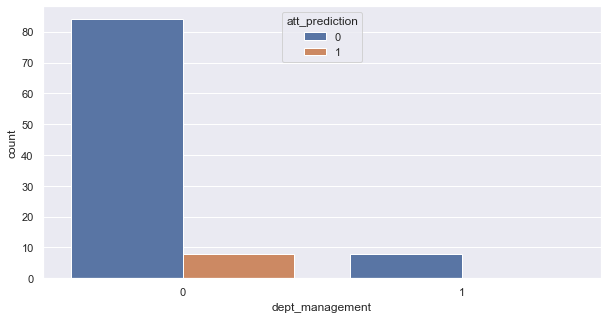

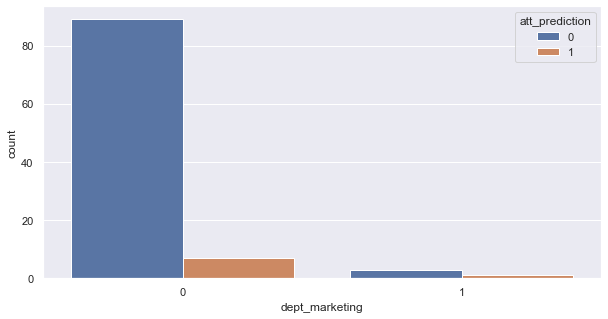

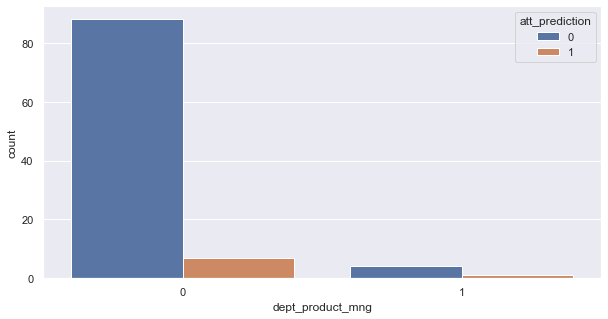

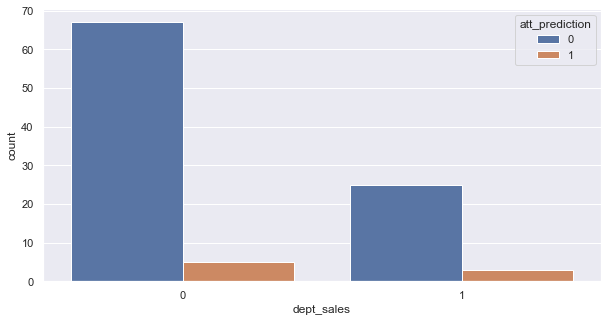

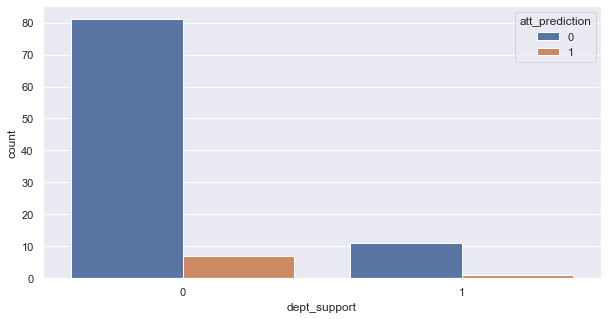

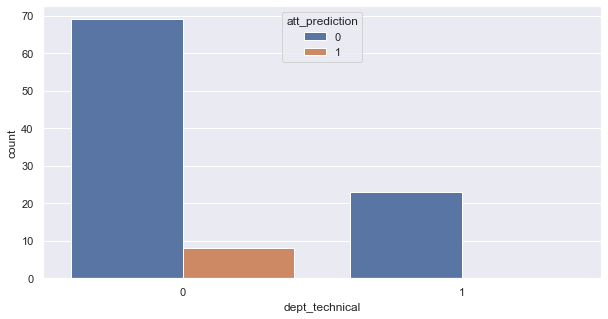

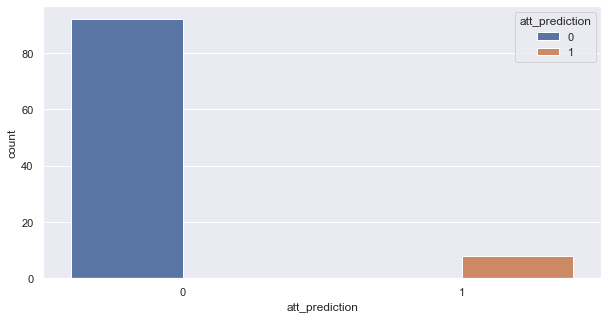

In [92]:
for i, col in enumerate(dept_vis.columns):
    plt.figure(i)
    sns.countplot(x=col, hue = 'att_prediction', data=dept_vis)

##### For both variables (attrition prediction & department), our focus here is on the 1s. Our model predicted that the employees prone to leave are majorly from the sales department.

#### Salary vs Attrition

In [93]:
salary_vis = predicted_result.copy()
salary_vis.drop(['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','dept_IT','dept_RandD', 'dept_accounting',
              'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
               'dept_support', 'dept_technical','dept_hr'], axis = 1, inplace= True)
salary_vis.columns

Index(['salary_high', 'salary_low', 'salary_medium', 'att_prediction'], dtype='object')

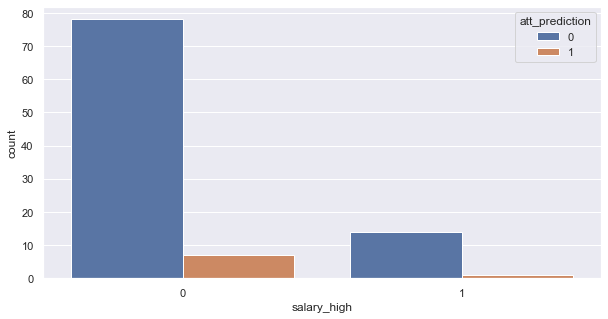

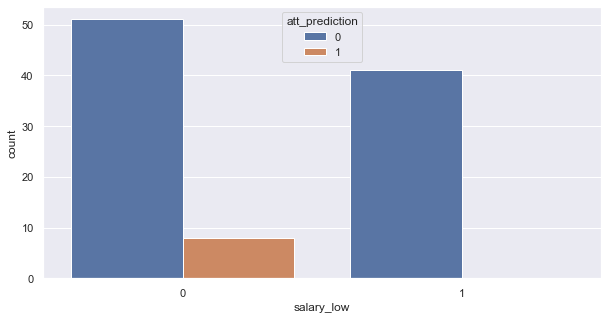

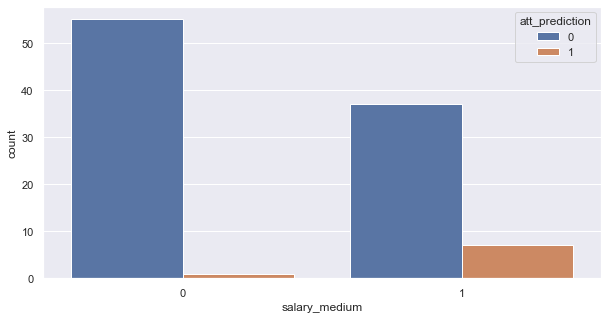

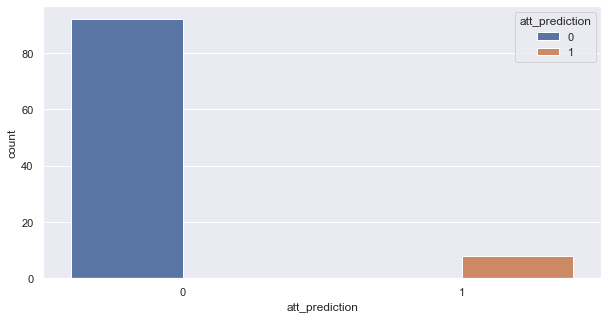

In [94]:
for i, col in enumerate(salary_vis.columns):
    plt.figure(i)
    sns.countplot(x=col, hue = 'att_prediction', data=salary_vis)

##### For both variables (attrition prediction & salary), our focus here is on the 1s. Our model predicted that most employees who are prone to leave the company are medium level income earners.

#### Satisfaction Level vs Attrition

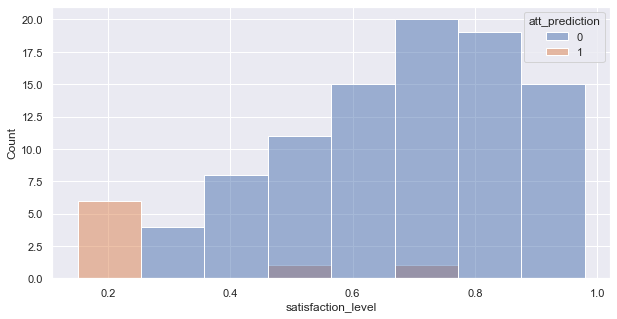

In [95]:
sns.histplot(data=predicted_result, x="satisfaction_level", hue="att_prediction")

##### For both variables (attrition prediction & satisfaction level), our focus here is on the 1s. Our model predicted that most employees who are prone to leave the company fall within the lowest satisfaction range (0.2).

#### Time Spent in the company vs Number of projects vs Attrition Prediction

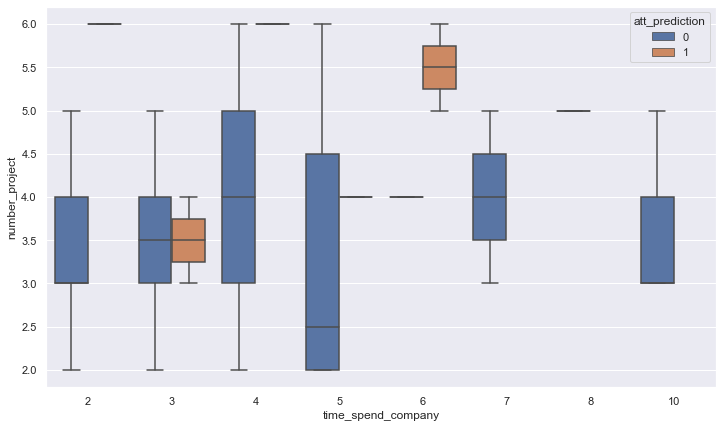

In [96]:
plt.figure(figsize=(12,7))
h = sns.boxplot(data=predicted_result, x="time_spend_company", y="number_project",  hue="att_prediction")

##### For the three variables (attrition prediction, number of projects & the time spent in the company), our focus here is on the 1s concerning attrition prediction. Our model predicted that most employees who are prone to leave the company are have spent between 2-3 years in the company. Also, have accomplished an average of 4-5 projects.

### Recommendations

- Quarterly checks should be carried out on all existing employees, to know their satisfaction levels.
- Employees who have stayed in the company for at least 3 years and have successfully implemented at least 3 projects succesfully with profitable results should be promoted or given a pay raise.
- Existing employees who work in the sales department should be reviewed. Reason being they have the ones with the most work disatisfaction, and highest attrition rate. Therefore, the company needs to pay close attention to that department and find out what is happening with them.